In [1]:
import sys

PWD = '../..'
sys.path.append(PWD)

from joblib import Parallel, delayed
import time

WAV_FILE_PATH = '../../data/input/waveforms.root'
DATASET_PATH = '../../data/converted_input/dataset.pkl'

IMAGES_DIR = '../../data/images/convert_input/'

import uproot
import pickle

import numpy as np
from matplotlib import pyplot as plt

from src.cfd import CFD
from src.waveform_data import EventData, WaveformData
from src.utils import save_plt

# Load file

In [2]:
N_JOBS = 16

In [3]:
SECTOR = 'sector 56'
STATION = 'station 220cyl'
RP = 'cyl_hr'

data_dir = f'wav/CTPPS/TimingDiamond/{SECTOR}/{STATION}/{RP}'

In [4]:
file_raw = uproot.open(WAV_FILE_PATH)

len(file_raw[data_dir].keys(recursive=False))

120017

In [5]:
sorted_events = sorted(file_raw[data_dir].keys(recursive=False), key=lambda x: int(x[6:-2]))
sorted_events[:10]

['event 3375;1',
 'event 6341;1',
 'event 7535;1',
 'event 8570;1',
 'event 9831;1',
 'event 9900;1',
 'event 10650;1',
 'event 11542;1',
 'event 13050;1',
 'event 14400;1']

In [6]:
file_raw[data_dir]['event 3375;1'].keys(recursive=False)

['plane 1;1', 'plane 2;1', 'plane 3;1']

In [7]:
file_raw[data_dir]['event 3375;1']['plane 1;1']['channel 11;1'].keys(recursive=False)

['t0;1', 'wavCal;1']

# Transform the dataset

In [8]:
# def find_slices(length, n):
#     interval = length // n
#     slices = [i * interval for i in range(n)] + [length]
#     return slices

# def transform_event_collection(file_raw, data_dir, events):
#     dataset = []
#     for event in events:
#         event_int = int(event[6:-2])
#         event_data = file_raw[data_dir][event]
#         dataset.append((event_int, EventData.from_event_data(event_data)))
#     return dataset

# start = time.time()
# slices = find_slices(len(sorted_events), N_JOBS)
# dataset = Parallel(n_jobs=N_JOBS)(delayed(transform_event_collection)(file_raw, data_dir, sorted_events[slices[i]:slices[i+1]]) for i in range(len(slices) - 1))
# dataset = dict(sum(dataset, []))
# end = time.time()
# print(f'Elapsed time: {end - start:0.2f} s')

# # store the dataset
# with open(DATASET_PATH, 'wb') as file:
#     pickle.dump(dataset, file)

In [9]:
file_raw.close()

In [10]:
# load the dataset
with open(DATASET_PATH, 'rb') as file:
    original_dataset = pickle.load(file)

In [11]:
print(original_dataset[3375])

{'plane 1': {'channel 11': 't0: 0.07946676015853882'}, 'plane 2': {'channel 11': 't0: 0.28291797637939453'}, 'plane 3': {'channel 11': 't0: 2.6671853065490723'}}


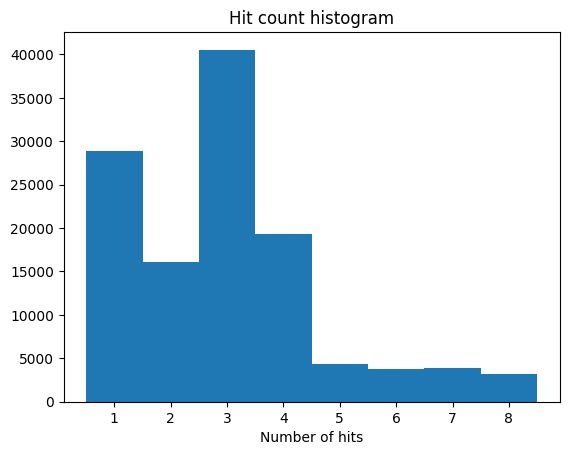

In [12]:
def plot_hit_count_histogram(dataset, title='Hit count histogram'):
    hit_count_histogram = [event_data.get_hit_count() for event_data in dataset.values()]

    plt.hist(hit_count_histogram, bins=range(1, 8 + 2), align='left')
    plt.title(title)
    plt.xlabel('Number of hits')
    
plot_hit_count_histogram(original_dataset)
plt.show()

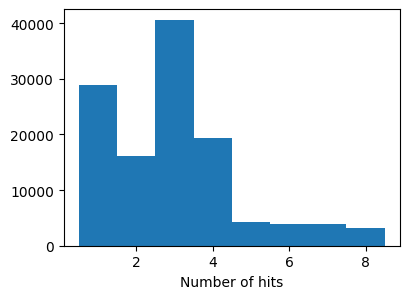

In [13]:
def plot_hit_count_histogram(dataset, title='Hit count histogram'):
    hit_count_histogram = [event_data.get_hit_count() for event_data in dataset.values()]

    plt.hist(hit_count_histogram, bins=range(1, 8 + 2), align='left')
    plt.xlabel('Number of hits')

plt.figure(figsize=(4.2, 3.1))
plot_hit_count_histogram(original_dataset)
plt.tight_layout()
save_plt(IMAGES_DIR + f"hit_count.pdf")
plt.show()

# Examples

In [14]:
events_to_view = []
for event, event_data in original_dataset.items():
    if event_data.get_plane_count() == 4 and event_data.get_hit_count() == 4:
        events_to_view.append(event)
    if len(events_to_view) == 10:
        break
        
events_to_view

[19792, 24253, 28186, 29933, 54450, 57600, 64950, 107178, 112450, 117600]

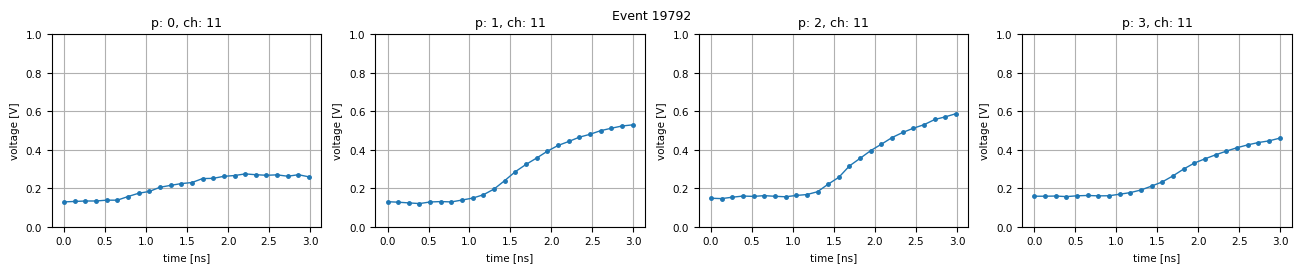

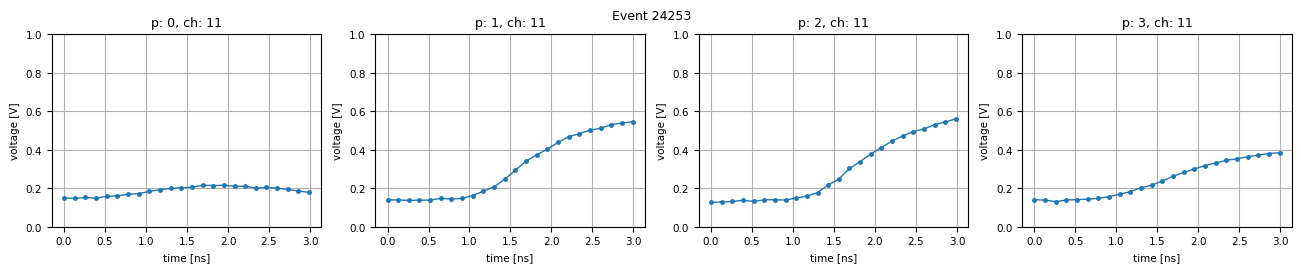

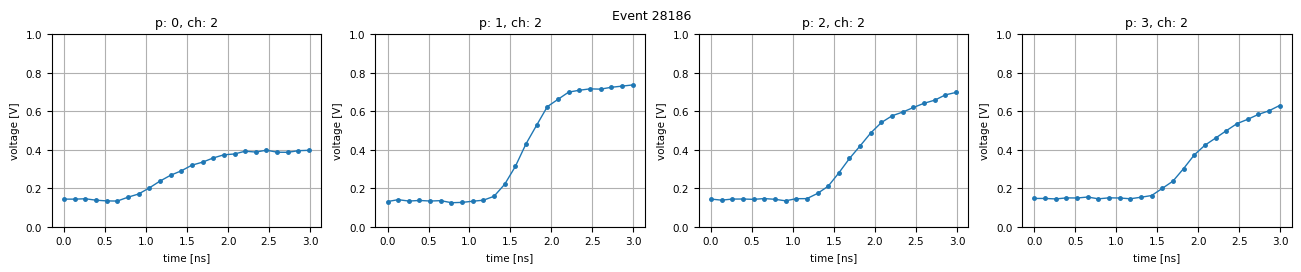

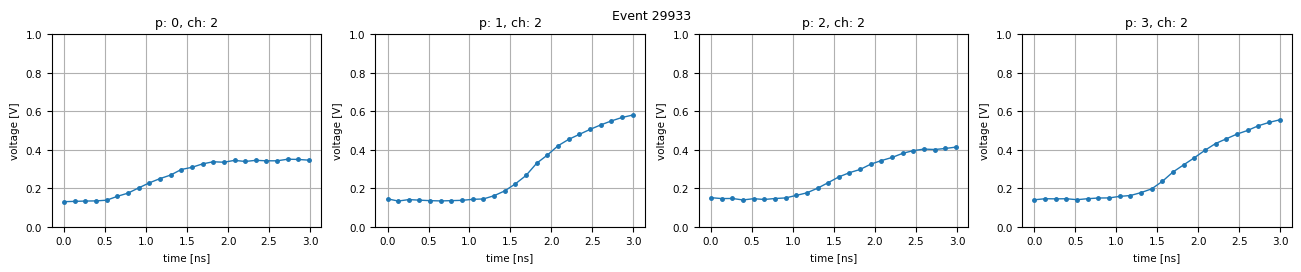

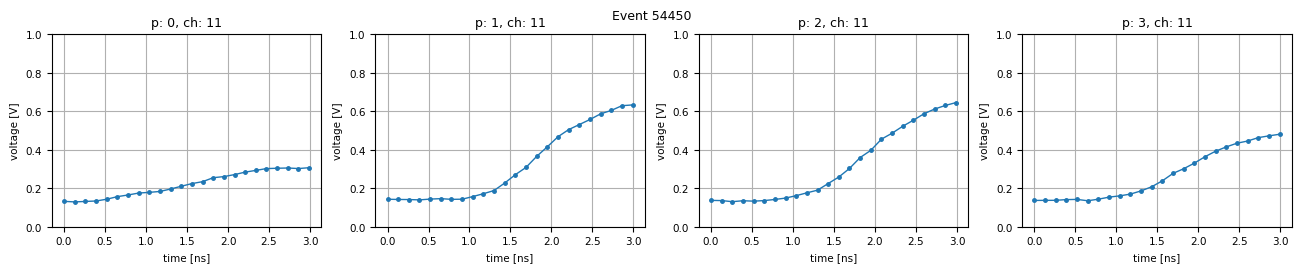

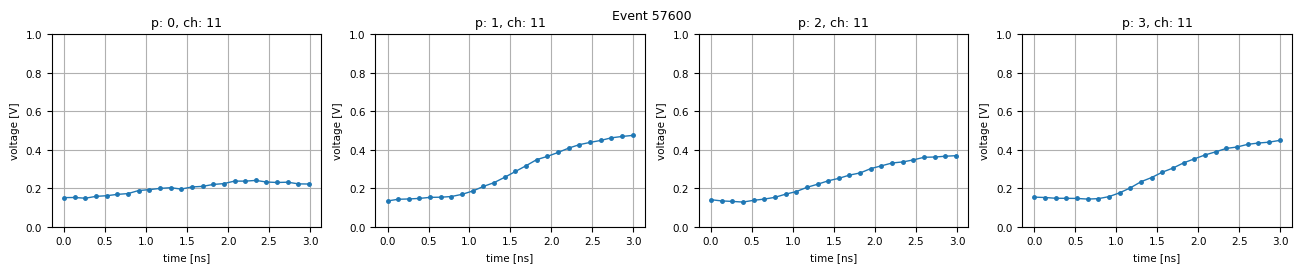

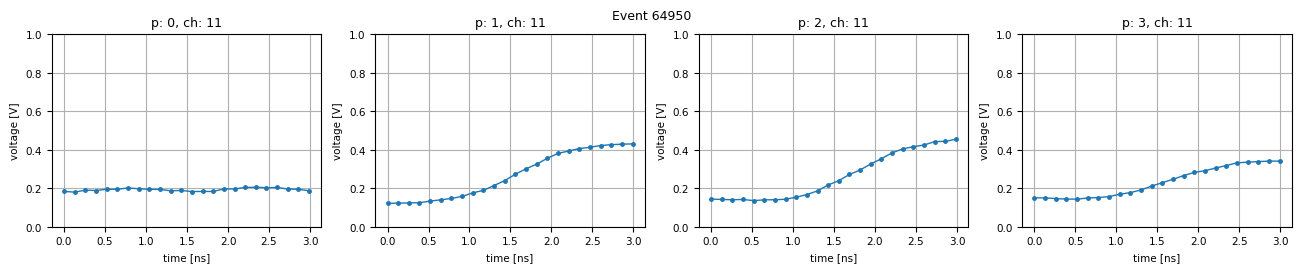

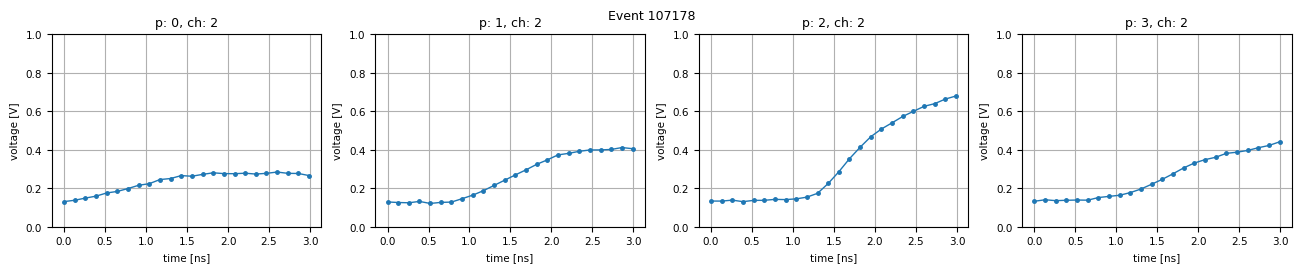

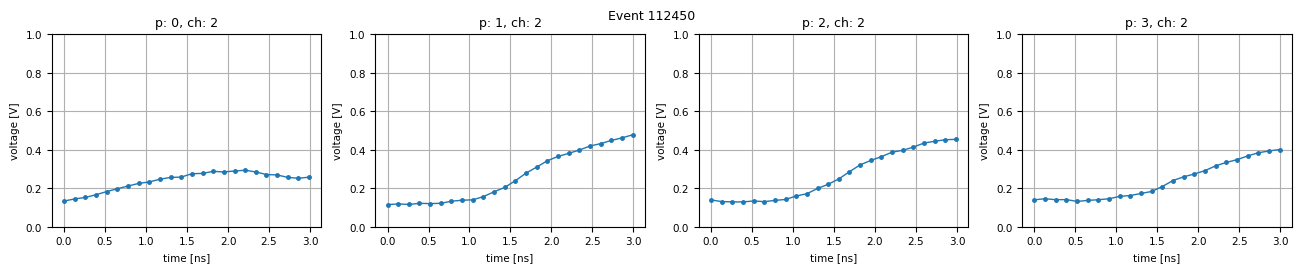

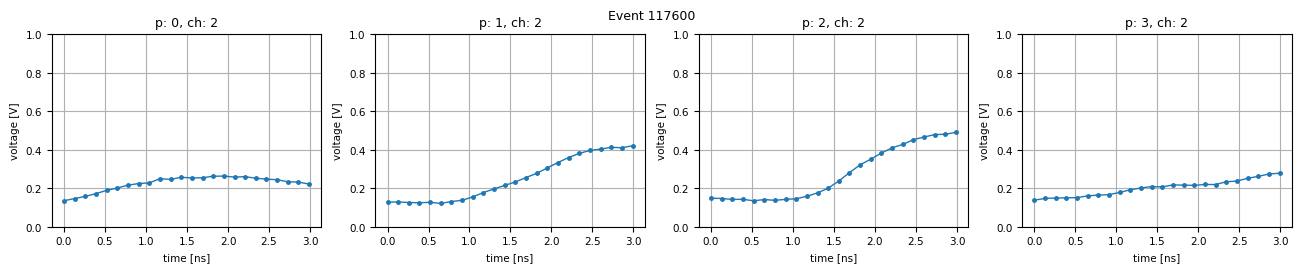

In [15]:
for event in events_to_view:
    plt.figure(figsize=(16, 2.5))
    plt.rc('font', size=7.5)
    
    for i, (plane, channel, wav_data) in enumerate(original_dataset[event].get_all_waveforms()):
        plt.subplot(1, 4, i + 1)
        plt.plot(wav_data.series[0], wav_data.series[1], marker='.', linewidth=1, markersize=5)
        plt.ylim(0, 1)
        plt.title(f'p: {plane}, ch: {channel}')
        plt.xlabel('time [ns]')
        plt.ylabel('voltage [V]')
        plt.grid()
    
    # plt.tight_layout()
    # plt.subplots_adjust(top=0.85)
    plt.suptitle(f'Event {event}')
    
    plt.show()

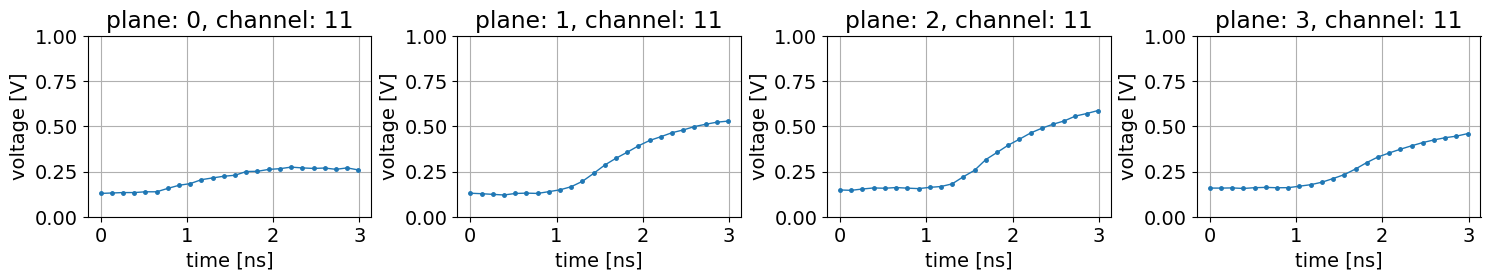

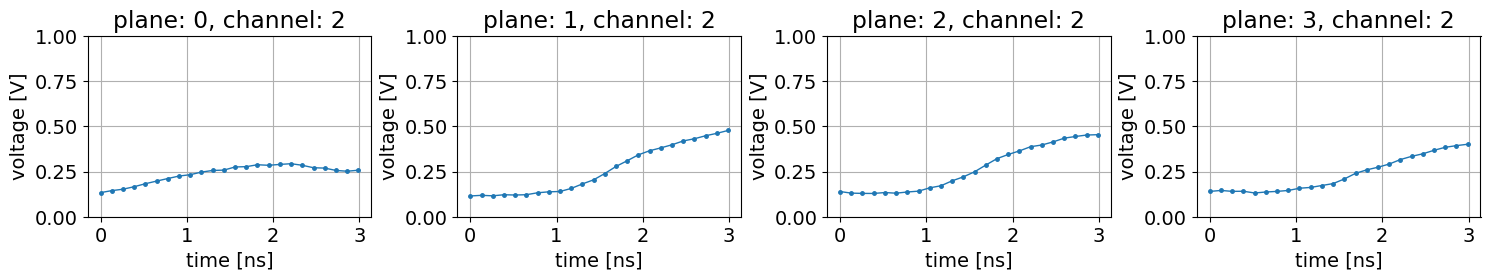

In [16]:
events_to_save = [19792, 112450]
for i_event, event in enumerate(events_to_save):
    plt.figure(figsize=(15, 3))
    plt.rc('font', size=14)
    
    for i, (plane, channel, wav_data) in enumerate(original_dataset[event].get_all_waveforms()):
        plt.subplot(1, 4, i + 1)
        plt.plot(wav_data.series[0], wav_data.series[1], marker='.', linewidth=1, markersize=5)
        plt.ylim(0, 1)
        plt.title(f'plane: {plane}, channel: {channel}')
        plt.xlabel('time [ns]')
        plt.ylabel('voltage [V]')
        plt.grid()
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    # plt.suptitle(f'Event {event}')
    
    save_plt(IMAGES_DIR + f"example_signal_{i_event}.pdf")
    plt.show()